In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# To read csv file which is stored in Googledrive:

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file, by right clicking on the file and copying the shared link for the ID.
downloaded_train = drive.CreateFile({'id':'1cte3mIrqeQO24P8GKjZArAMyjo5PBG-Z'}) # replace the id with id of file you want to access
downloaded_train.GetContentFile('train.csv')
downloaded_test = drive.CreateFile({'id':'1lZyUNmgSbwTgbFtl7bM0wFMSAjHUi-ND'}) # replace the id with id of file you want to access
downloaded_test.GetContentFile('test.csv')

#3. Read file as panda dataframe
dataset = pd.read_csv("train.csv")
dataset_test = pd.read_csv("test.csv")

In [0]:
dataset.head(5)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [0]:
dataset.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,156641.900169,0.493260,0.507171,0.498688,0.491163,0.487174,0.490602,0.484355,0.485546,0.485119,0.497531,0.492874,0.492543,0.493291,0.496732,3040.359437
std,90149.925142,0.187698,0.207297,0.202302,0.211479,0.208837,0.205240,0.178139,0.198704,0.181772,0.185748,0.209512,0.209156,0.212668,0.222587,2922.202773
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.180268,5.250000
25%,78648.500000,0.346090,0.358319,0.336963,0.327354,0.281143,0.335056,0.350175,0.312800,0.358970,0.364580,0.310961,0.308395,0.315758,0.294839,1200.785000
50%,156609.000000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.437799,0.441060,0.437310,0.461190,0.457203,0.462286,0.363547,0.410939,2119.080000
75%,234496.500000,0.623912,0.681761,0.634224,0.652072,0.635304,0.654756,0.590568,0.617950,0.558550,0.614590,0.678924,0.675759,0.689974,0.724797,3869.965000
max,312551.000000,0.984452,0.862654,0.944251,0.952482,0.983674,0.997162,1.000000,0.980200,0.993790,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [0]:
########## axis=0是行，axis=1是列

dataset.drop("id", axis = 1, inplace = True)

In [0]:
########## 观察mean和50%可以比较平均数和中位数，可以得知数据集是否分布比较接近正太分布

dataset.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.493260,0.507171,0.498688,0.491163,0.487174,0.490602,0.484355,0.485546,0.485119,0.497531,0.492874,0.492543,0.493291,0.496732,3040.359437
std,0.187698,0.207297,0.202302,0.211479,0.208837,0.205240,0.178139,0.198704,0.181772,0.185748,0.209512,0.209156,0.212668,0.222587,2922.202773
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.180268,5.250000
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.335056,0.350175,0.312800,0.358970,0.364580,0.310961,0.308395,0.315758,0.294839,1200.785000
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.437799,0.441060,0.437310,0.461190,0.457203,0.462286,0.363547,0.410939,2119.080000
75%,0.623912,0.681761,0.634224,0.652072,0.635304,0.654756,0.590568,0.617950,0.558550,0.614590,0.678924,0.675759,0.689974,0.724797,3869.965000
max,0.984452,0.862654,0.944251,0.952482,0.983674,0.997162,1.000000,0.980200,0.993790,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [0]:
# Check how many rows and columns we have here

dataset.shape

(99999, 132)

In [0]:
dataset.columns

Index([u'id', u'cat1', u'cat2', u'cat3', u'cat4', u'cat5', u'cat6', u'cat7',
       u'cat8', u'cat9',
       ...
       u'cont6', u'cont7', u'cont8', u'cont9', u'cont10', u'cont11', u'cont12',
       u'cont13', u'cont14', u'loss'],
      dtype='object', length=132)

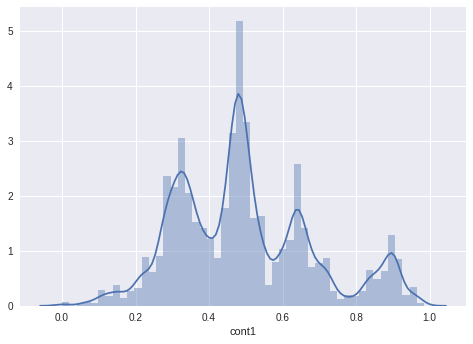

In [0]:
############## check the distribution of a column which is consisted of numbers, use the order "sns.distplot"

# distplot只能应用于数字列，不然试试用cat1就无法计算，因为元素不是数字，无法比对大小
########### distplot is the main function here, result is a relative ratio

sns.distplot(dataset["cont1"])
# 多峰的分布
# 看分布的意义是找到outlier，0.0附近是outlier

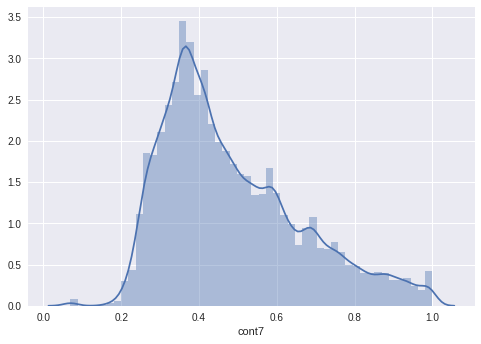

In [0]:
sns.distplot(dataset["cont7"])
# 长尾模型会导致及其学习的时候很难识别，会影响模型的精度
# 长尾的模型会使得模型的收敛上产生抖动
# 模型理想情况是标准的正太分布

In [0]:
######### skew看偏移度
dataset["cont1"].skew()

0.520519502033601

In [0]:
################## 看所有的偏移
# >0.5的偏移都比较大了，0.2、0.3都是比较好的数据

dataset.skew()

cont1     0.520520
cont2    -0.314446
cont3    -0.008636
cont4     0.421105
cont5     0.685966
cont6     0.459900
cont7     0.830577
cont8     0.681937
cont9     1.075352
cont10    0.358455
cont11    0.282744
cont12    0.292981
cont13    0.379578
cont14    0.241355
loss      4.186536
dtype: float64

In [0]:
######### 用np.log来减小偏移， log默认是以e为底的

dataset["loss"].apply(np.log).skew()

0.0933860896570425

In [0]:
dataset["loss"].skew()

4.1865363491554035

In [0]:
## 定义新loss
dataset["loss"]=dataset["loss"].apply(np.log)

In [0]:
dataset["loss"].skew()

0.0933860896570425

In [0]:
# kurtosis峰值, 数值越小表示模型越尖锐，机器学习的时候squared error越大
dataset["cont7"].kurtosis()

0.0607737295591404

In [0]:
# 一般也是通过取log方式调整峰值
dataset["cont7"].apply(np.log).kurtosis()

0.26276371670225407

In [0]:
dataset.kurtosis()

cont1    -0.091878
cont2    -0.893709
cont3    -0.611526
cont4    -0.964874
cont5    -0.868461
cont6    -0.764037
cont7     0.060774
cont8    -0.527510
cont9     0.572534
cont10   -0.845007
cont11   -1.047024
cont12   -1.025892
cont13   -1.351657
cont14   -1.534417
loss     -0.146967
dtype: float64

In [0]:
#把所有cont的列取出来，也就是倒是十五行
########## iloc = index location
split = 116
size = 15
data = dataset.iloc[:, split:] ### all rows, columns from 116 to the rest
data.shape

(99999, 15)

In [0]:
data.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,7.702186
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,7.157424
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,8.008063
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,6.845720
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,7.924380


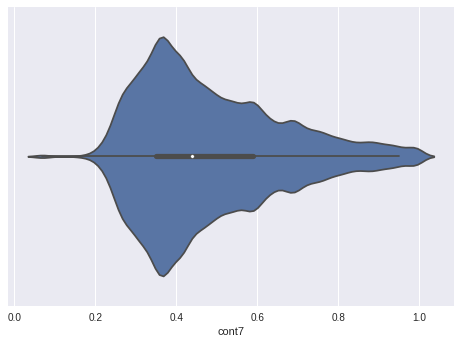

In [0]:
# 单一用plot操作只能打印一个图形
sns.violinplot(dataset["cont7"])

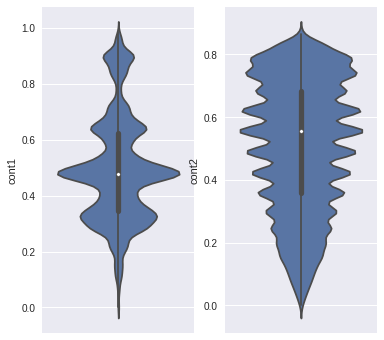

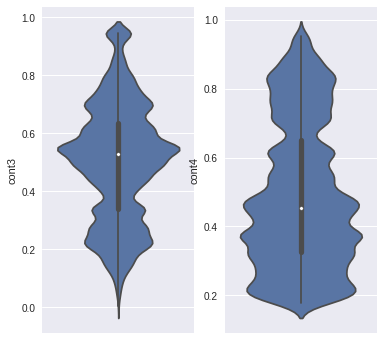

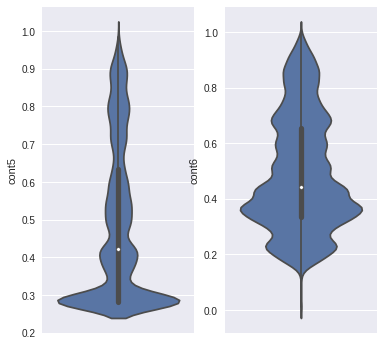

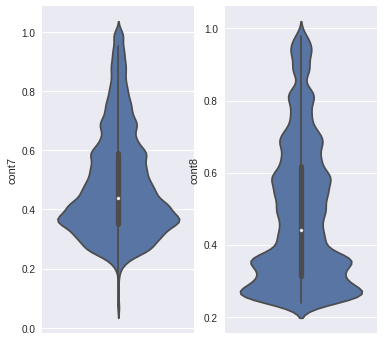

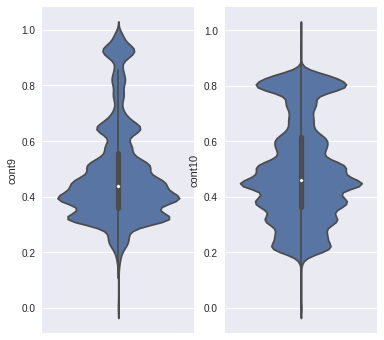

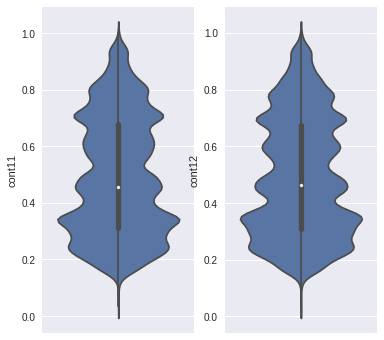

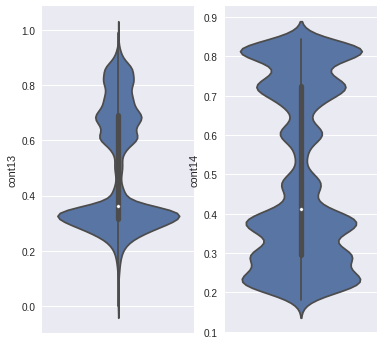

In [0]:
######### sns.violinplot reflects the distribution as a relative ratio

# make this figture function
cols = data.columns
n_cols = 2
n_rows = 7

# violin plot
for i in range(n_rows): # 用for函数，把所有图形一起显示出来
  fg, ax = plt.subplots(nrows = 1, ncols = n_cols, figsize = (6, 6)) #figsize是图形的显示大小
  for j in range(n_cols):
    sns.violinplot(y = cols[i * n_cols + j], data = dataset, ax = ax[j]) 
    # y指的是要挑选的用于violinplot的对象
    
plt.show()

# cont2 has many spikes at specific points

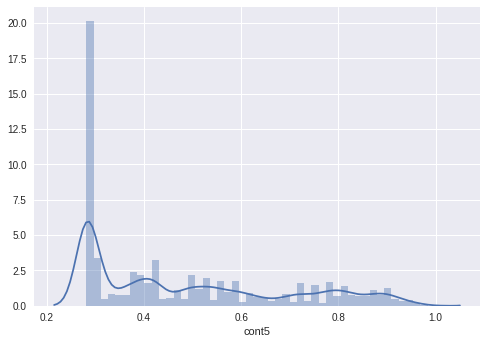

In [0]:
sns.distplot(dataset["cont5"])

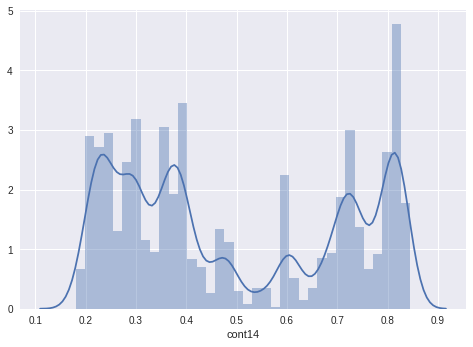

In [0]:
sns.distplot(dataset["cont14"])


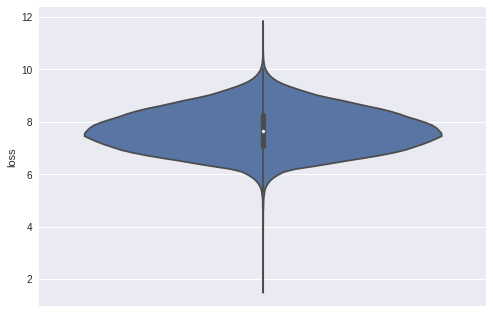

In [0]:
sns.violinplot(data = dataset, y = "loss")

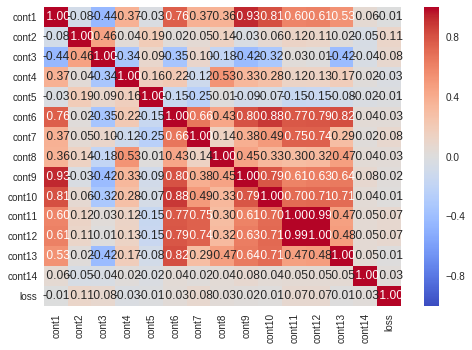

In [0]:
# data interaction, correlation
# correlation between feature and target(loss)越强越好
# correlation among features越小越好，否则会有共线性问题
# correlation pearson

g = sns.heatmap(dataset.corr(), annot = True, fmt = " .2f", cmap = "coolwarm")

############ heatmap， fmt浮点数保留小数点后数值，coolwarm从冷色调到暖色调
# heatmap是核心算法函数
plt.show()

In [0]:
data_corr = data.corr() ############ data.corr is the main function here
threshold = 0.5 #如果小于此threshold就不会被筛选进来
corr_list = []
for i in range(0, size): #size has been defined as 15 in the context above
  for j in range(i +1, size): # + 1 is to prevent the repeated paired, so every pair is consisted by a smaller number and a bigger number
    if (data_corr.iloc[i, j] >= threshold and data_corr.iloc[i, j] <1) or (data_corr.iloc[i, j]<0 and data_corr.iloc[i, j] <= -threshold):
      corr_list.append([data_corr.iloc[i, j], i, j])
s_corr_list = sorted(corr_list, key = lambda x: -abs(x[0])) # abs=absolute, x[0] means take the first one
for v, i, j in s_corr_list:
  print("%s and %s = %.2f" % (cols[i], cols[j], v)) #.2f是指2位小数
    

cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont6 and cont10 = 0.88
cont6 and cont13 = 0.82
cont1 and cont10 = 0.81
cont6 and cont9 = 0.80
cont6 and cont12 = 0.79
cont9 and cont10 = 0.79
cont6 and cont11 = 0.77
cont1 and cont6 = 0.76
cont7 and cont11 = 0.75
cont7 and cont12 = 0.74
cont10 and cont12 = 0.71
cont10 and cont13 = 0.71
cont10 and cont11 = 0.70
cont6 and cont7 = 0.66
cont9 and cont13 = 0.64
cont9 and cont12 = 0.63
cont1 and cont12 = 0.61
cont9 and cont11 = 0.61
cont1 and cont11 = 0.60
cont1 and cont13 = 0.53
cont4 and cont8 = 0.53


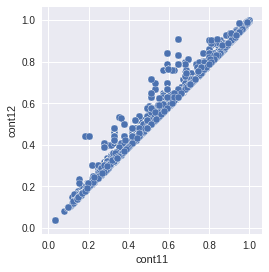

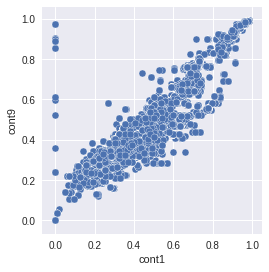

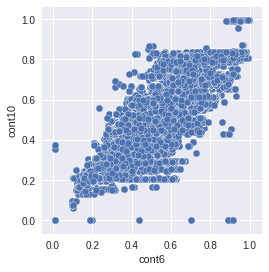

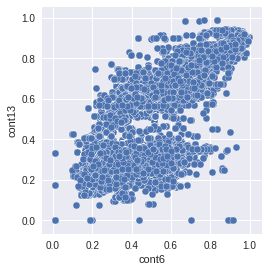

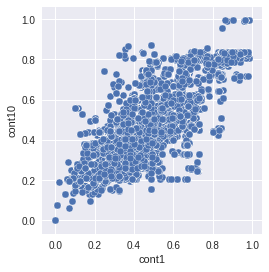

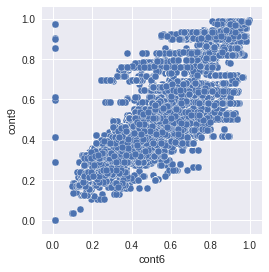

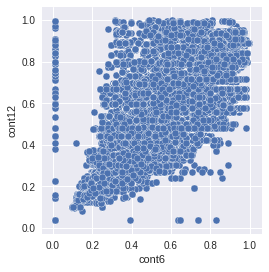

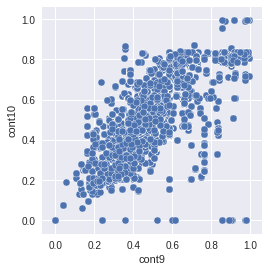

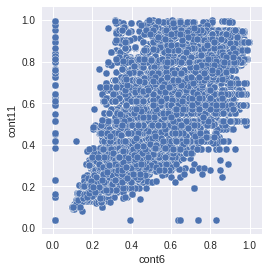

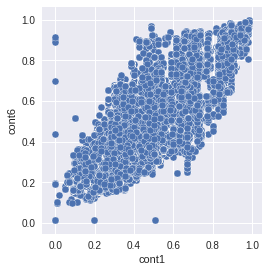

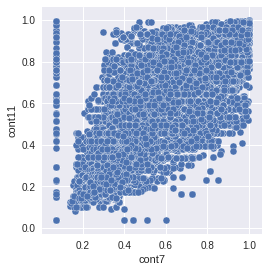

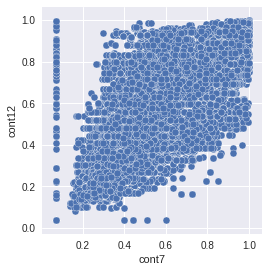

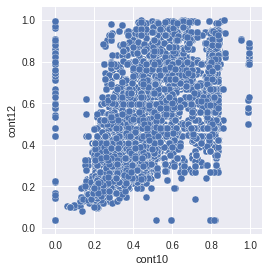

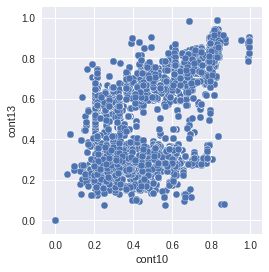

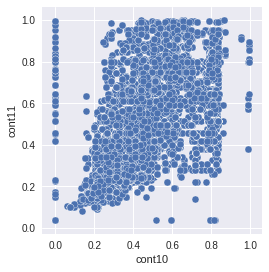

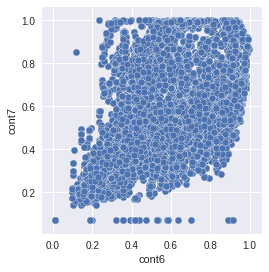

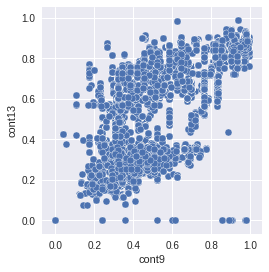

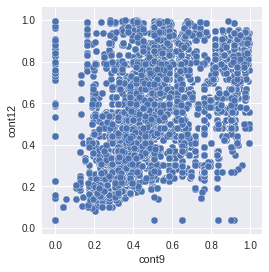

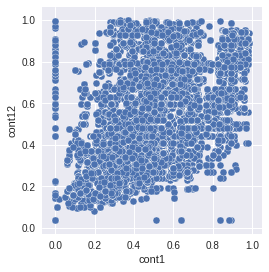

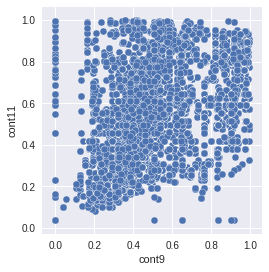

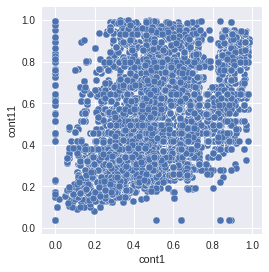

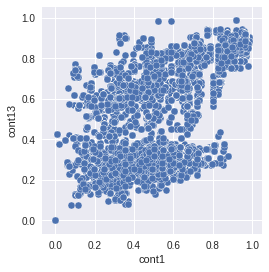

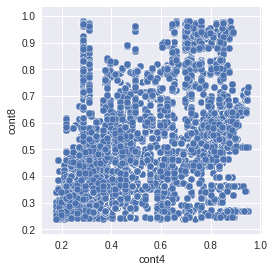

In [0]:
############ scatter distribution
############  pairplot is the main function here

for v, i, j in s_corr_list: #用for函数展示全部, elements have been defined in the context above
  sns.pairplot(dataset, size = 4, x_vars = cols[i], y_vars = cols[j])
# cont11 和cont12 有很强相关性，必须去除一个


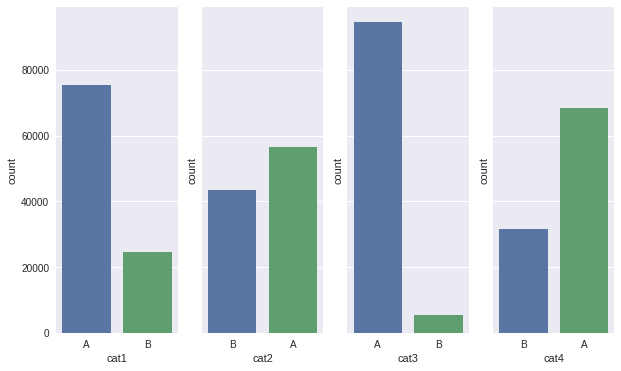

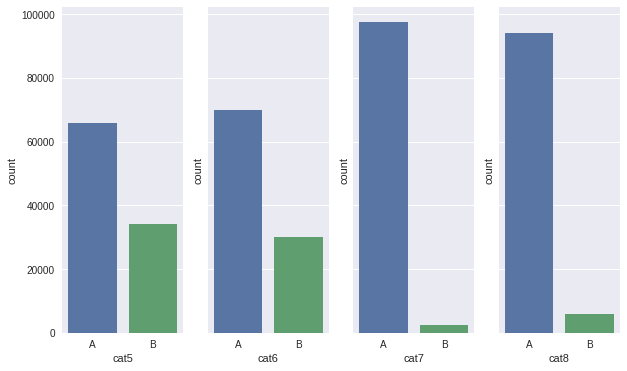

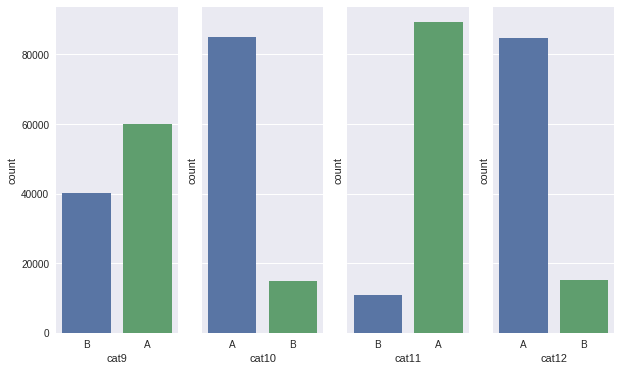

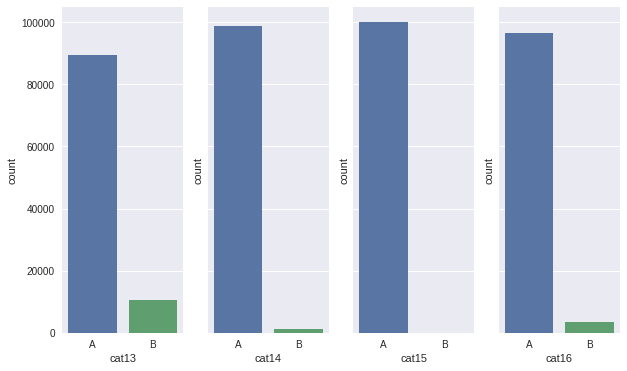

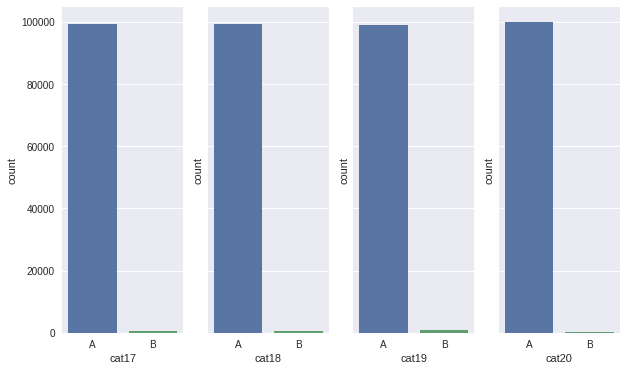

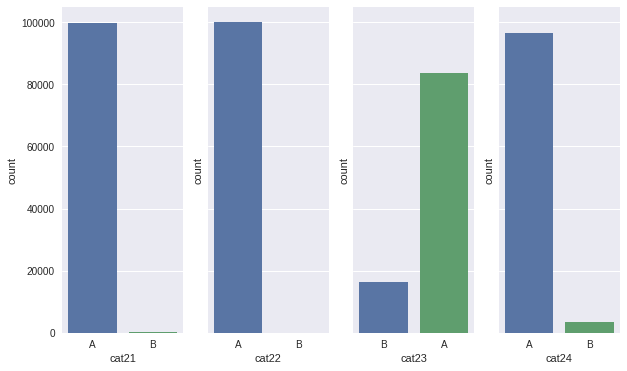

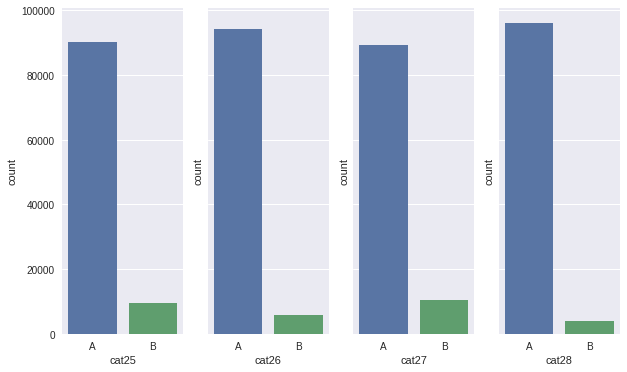

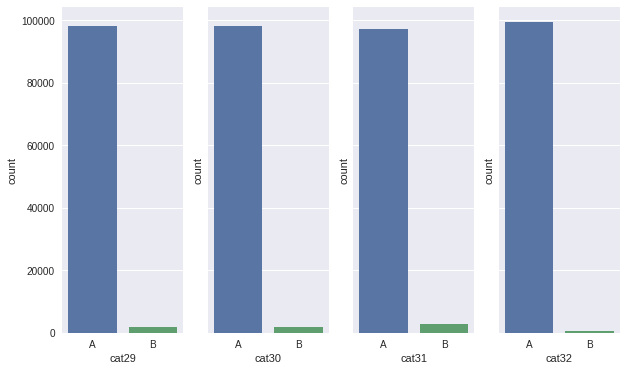

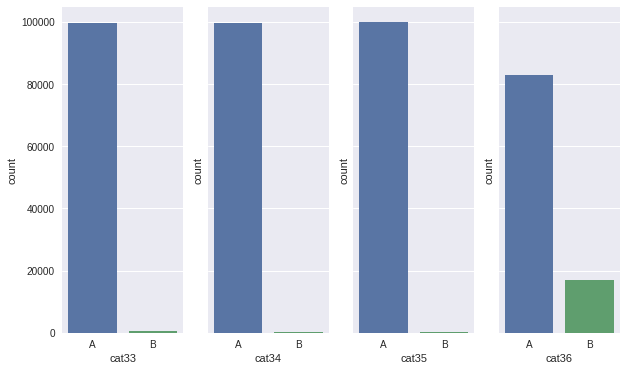

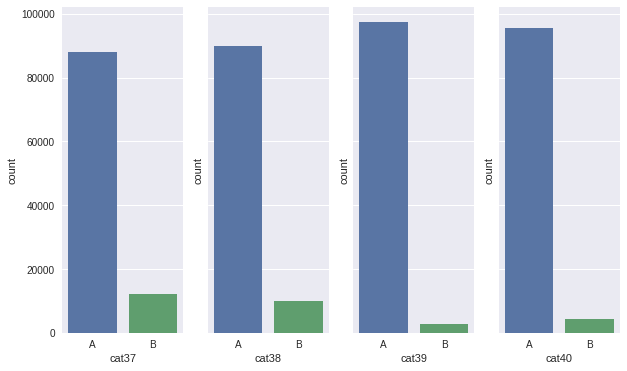

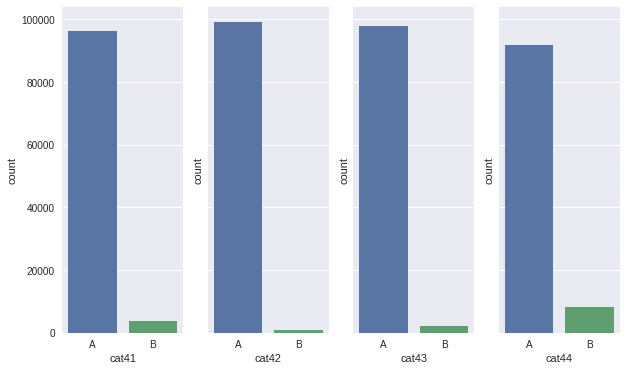

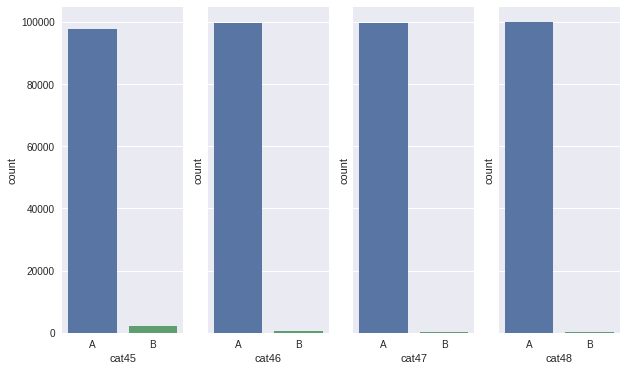

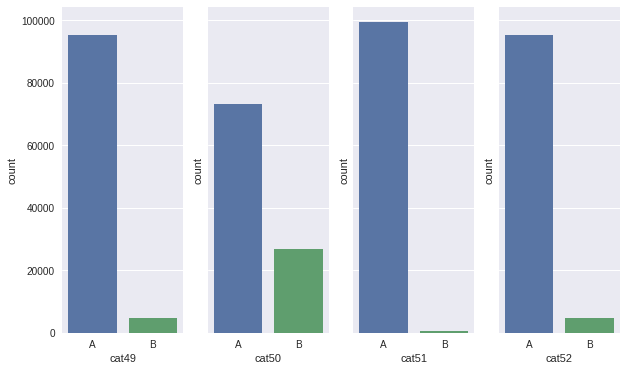

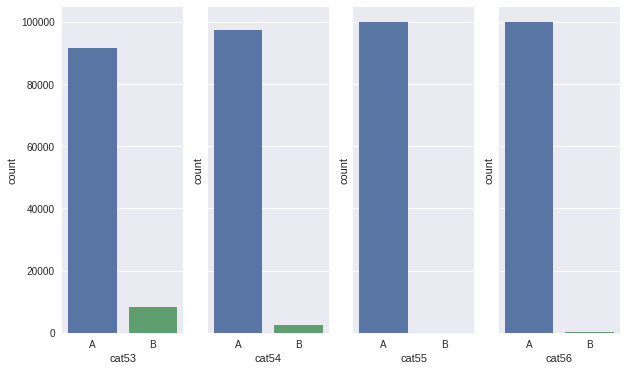

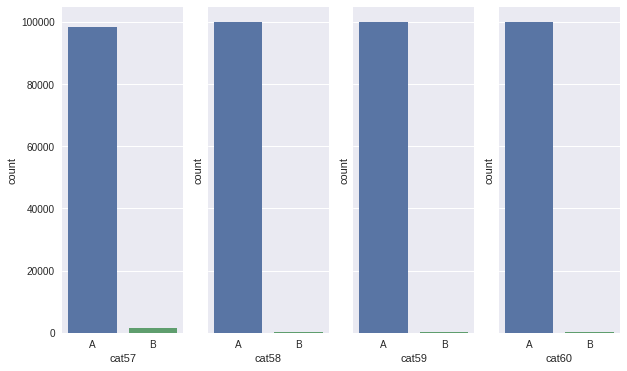

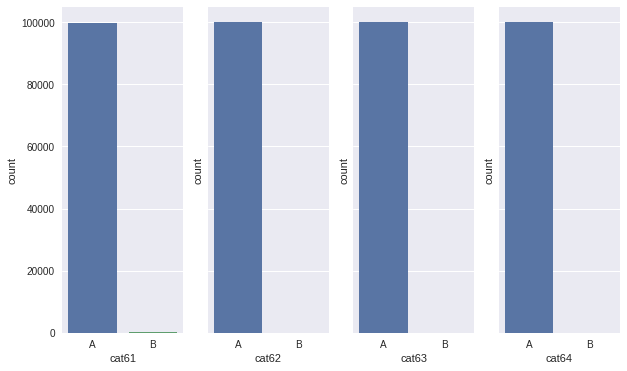

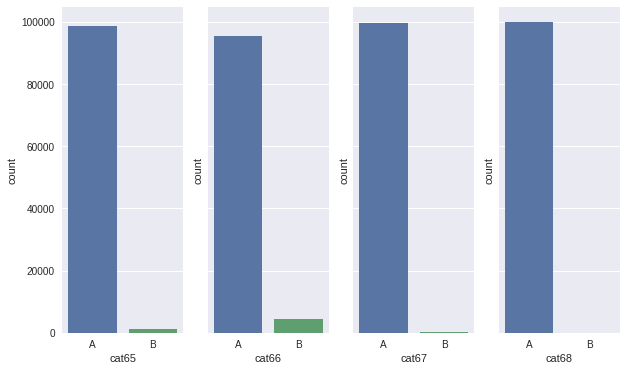

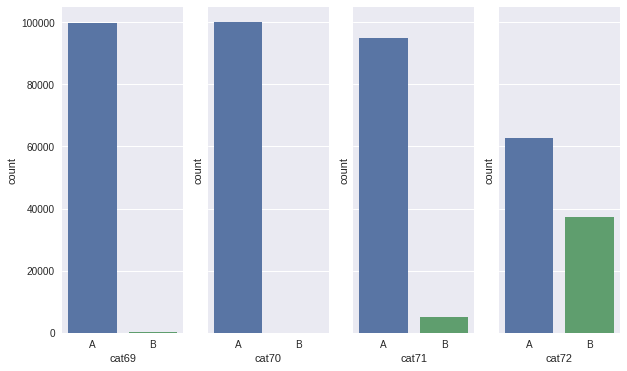

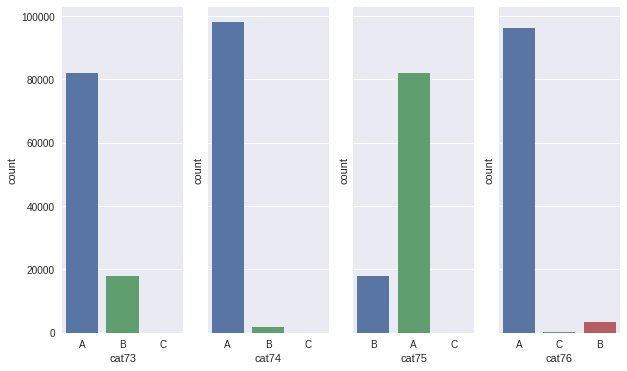

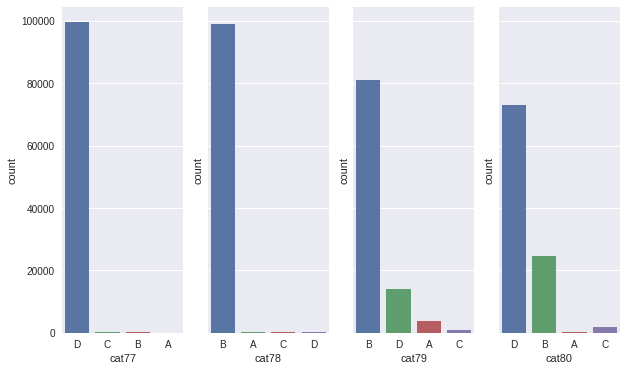

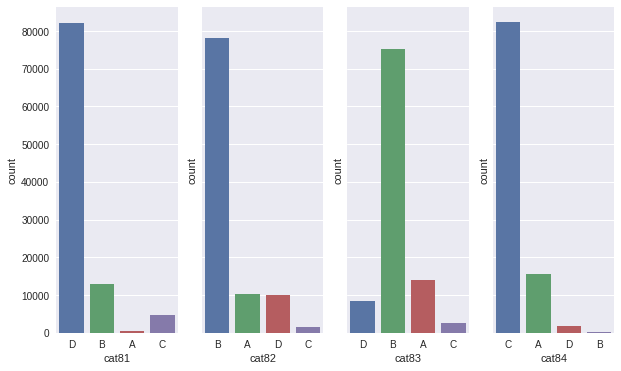

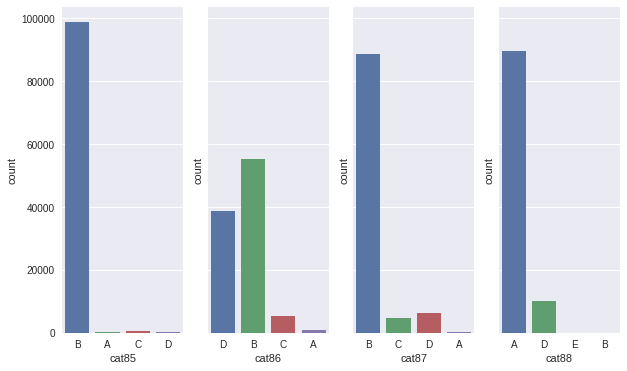

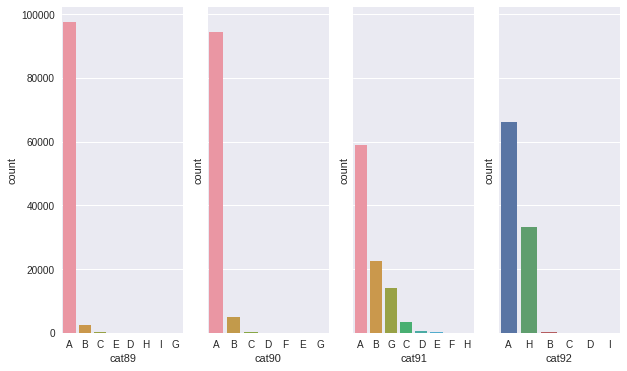

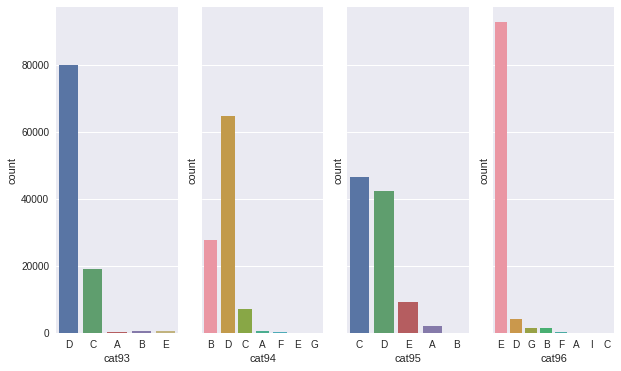

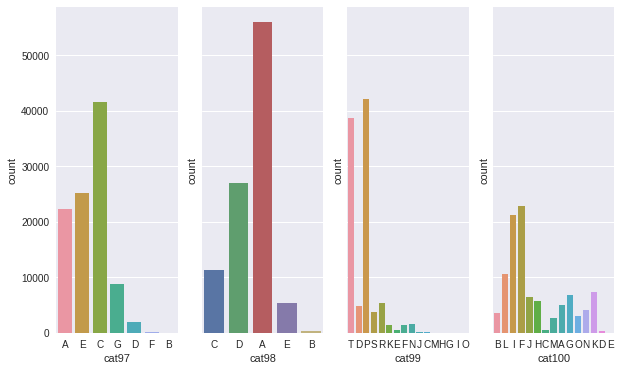

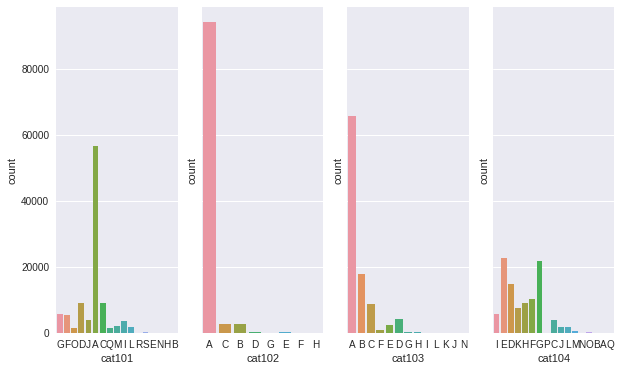

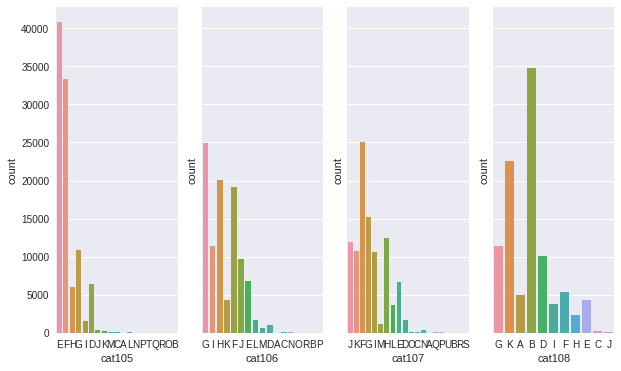

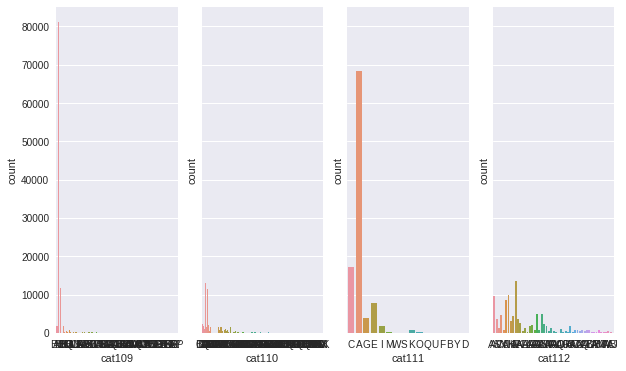

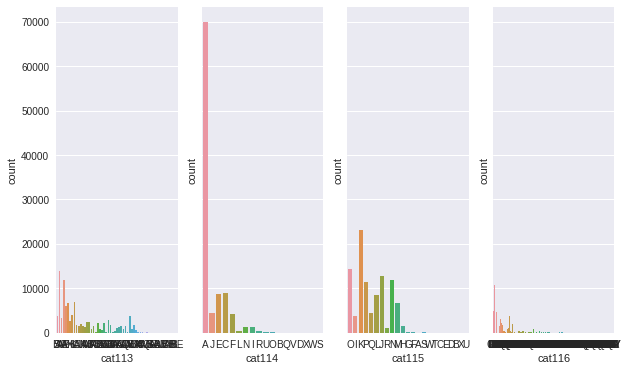

In [0]:
############ 核心算法是countplot, 
cols = dataset.columns
n_cols = 4
n_rows = 29

# 使用柱状图countplot, 看imbalanced
for i in range(n_rows):
  fg, ax = plt.subplots(nrows = 1, ncols = n_cols, sharey = True, figsize = (10,6))
  for j in range(n_cols):
    sns.countplot(x = cols[i * n_cols + j], data = dataset, ax = ax[j])
plt.show()